# Riddler Express

You place 100 coins heads up in a row and number them by position, with the coin all the way on the left No. 1 and the one on the rightmost edge No. 100. Next, for every number N, from 1 to 100, you flip over every coin whose position is a multiple of N. For example, first you’ll flip over all the coins, because every number is a multiple of 1. Then you’ll flip over all the even-numbered coins, because they’re multiples of 2. Then you’ll flip coins No. 3, 6, 9, 12… And so on.

What do the coins look like when you’re done? Specifically, which coins are heads down?

In [2]:
import itertools

# heads = True
# tails = False

# Initialize coins to all heads
coins = [True]*100

for factor in range(100):
    # This will generate N zeros, then a 1.  This repeats forever
    flip_generator = itertools.cycle([0]*factor+[1])
    
    # This will take the first 100 items from the generator
    flips = itertools.islice(flip_generator,100)
    
    for index, flip in enumerate(flips):
        if flip:
            coins[index] = not coins[index]
            
# 1 has to be added to account for python 0-indexing
coins_tails = [index+1 for index,state in enumerate(coins) if state == False]

print(coins_tails)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [3]:
import numpy as np
import itertools

# Alternative approach which counts the amount of flips.  If even, the coin remains heads up.
# If odd, the coin would end up tails up.

total_flips = [0]*100

for factor in range(100):
    # This will generate N zeros, then a 1.  This repeats forever
    flip_generator = itertools.cycle([0]*factor+[1])

    # This will take the first 100 items from the generator
    flips = list(itertools.islice(flip_generator,100))

    total_flips = np.sum((total_flips,flips),axis=0)

# 1 has to be added to account for python 0-indexing
odd_flips = [index+1 for index,num_flips in enumerate(coins) if num_flips % 2 == 0]

print(odd_flips)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


# Classic Riddler

While traveling in the Kingdom of Arbitraria, you are accused of a heinous crime. Arbitraria decides who’s guilty or innocent not through a court system, but a board game. It’s played on a simple board: a track with sequential spaces numbered from 0 to 1,000. The zero space is marked “start,” and your token is placed on it. You are handed a fair six-sided die and three coins. You are allowed to place the coins on three different (nonzero) spaces. Once placed, the coins may not be moved.

After placing the three coins, you roll the die and move your token forward the appropriate number of spaces. If, after moving the token, it lands on a space with a coin on it, you are freed. If not, you roll again and continue moving forward. If your token passes all three coins without landing on one, you are executed. On which three spaces should you place the coins to maximize your chances of survival?

Extra credit: Suppose there’s an additional rule that you cannot place the coins on adjacent spaces. What is the ideal placement now? What about the worst squares — where should you place your coins if you’re making a play for martyrdom?

In [4]:
%matplotlib inline
import numpy as np

NUM_SPACES = 1000

probs = np.zeros((1000,1000))

# Seed first column of probabilities
# The first 6 values should be 1/6
probs[0:6,0] = np.array([1/6]*6)

for col in np.arange(1,NUM_SPACES):
    for row in np.arange(NUM_SPACES):
        target_col = col-1
        start_row = max(0,row-6)
        end_row = max(0,row)        
        new_val = sum(probs[start_row:end_row,target_col])/6
        probs[row,col] = new_val

6


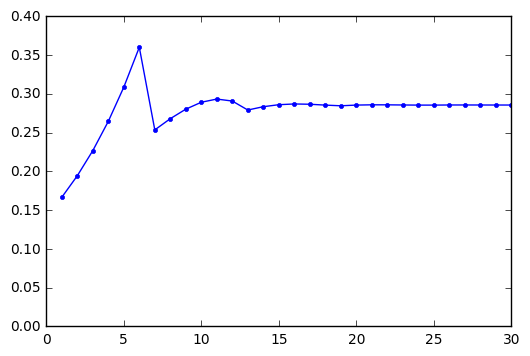

In [8]:
from matplotlib import pyplot as plt
sum_probs = np.sum(probs,axis=1)

x1 = np.arange(1,31)
y1 = sum_probs[:30]

plt.plot(x1,y1,marker='.',color='b')
plt.ylim(0)
plt.draw()
print(np.argmax(sum_probs)+1)

If I would not have seen this particular tweet (https://twitter.com/xaqwg/status/787791061821161472), I may have stopped there, with the answers [5,6,11].

However, I see now how the next coin must account for the odds assuming the 6 is NOT hit (because the game must be over).  If a significant portion of 11's probability comes from rolls that have previously hit 6, it may not be the best choice.

However, I wasn't able to find out why my graphs were not modified for the spaces < 3.  I don't see how those probabilities could have been modified, but I'll wait to see the answer.

In [9]:
second_probs = np.zeros((1000,1000))

# Seed first column of probabilities
# The first 5 values should be 1/6
second_probs[0:5,0] = np.array([1/6]*5)

for col in np.arange(1,NUM_SPACES):
    for row in np.arange(NUM_SPACES):
        target_col = col-1
        start_row = max(0,row-6)
        end_row = max(0,row)        
        new_val = sum(second_probs[start_row:end_row,target_col])/6
        if row == 5:
            second_probs[row,col] = 0
        else:
            second_probs[row,col] = new_val

5


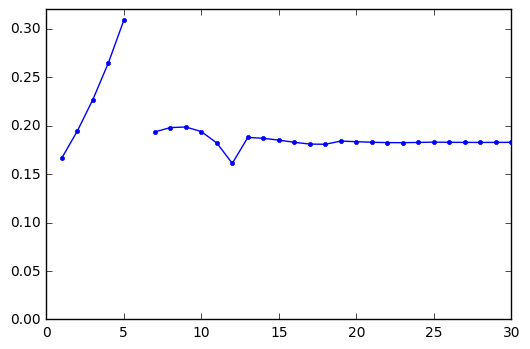

In [15]:
from matplotlib import pyplot as plt
sum_second_probs = np.sum(second_probs,axis=1)

x2 = np.arange(1,31)
y2 = sum_second_probs[:30]

plt.plot(x2[:5],y2[:5],marker='.',color='b')
plt.plot(x2[6:31],y2[6:31],marker='.',color='b')
plt.ylim(0)
plt.draw()
print(np.argmax(sum_second_probs)+1)

In [11]:
third_probs = np.zeros((1000,1000))

# Seed first column of probabilities
# The first 4 values should be 1/6
third_probs[0:4,0] = np.array([1/6]*4)

for col in np.arange(1,NUM_SPACES):
    for row in np.arange(NUM_SPACES):
        target_col = col-1
        start_row = max(0,row-6)
        end_row = max(0,row)        
        new_val = sum(third_probs[start_row:end_row,target_col])/6
        if row == 5 or row == 4:
            third_probs[row,col] = 0
        else:
            third_probs[row,col] = new_val

4


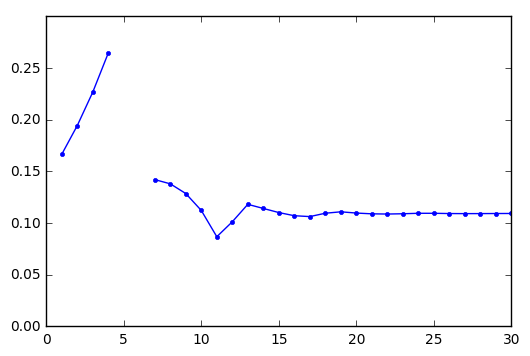

In [14]:
from matplotlib import pyplot as plt
sum_third_probs = np.sum(third_probs,axis=1)

x3 = np.arange(1,31)
y3 = sum_third_probs[:30]

plt.plot(x3[:4],y3[:4],marker='.',color='b')
plt.plot(x3[6:31],y3[6:31],marker='.',color='b')
plt.ylim(0)
plt.draw()
print(np.argmax(sum_third_probs)+1)

[6, 5, 4]


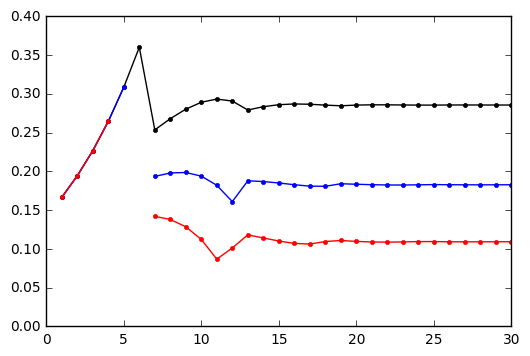

In [17]:
plt.plot(x1,y1,marker='.',color='k')
plt.plot(x2[:5],y2[:5],marker='.',color='b')
plt.plot(x2[6:31],y2[6:31],marker='.',color='b')
plt.plot(x3[:4],y3[:4],marker='.',color='r')
plt.plot(x3[6:31],y3[6:31],marker='.',color='r')

plt.ylim(0)
plt.draw()
print([np.argmax(sum_probs)+1,
       np.argmax(sum_second_probs)+1,
       np.argmax(sum_third_probs)+1])

In [70]:
# Implementing the recursive solution from
# http://www.laurentlessard.com/bookproofs/the-deadly-board-game/

p_cache = dict()

def p(k):
    try:
        return p_cache[k]
    except KeyError:
        if k == 0:
            answer = float(1)
        elif k < 0:
            answer = float(0)
        else:
            answer = float((p(k-1)+p(k-2)+p(k-3)+p(k-4)+p(k-5)+p(k-6))/6)
        
        p_cache[k] = answer
        return answer
    
def q(k,m):
    return p(k)+p(m)-p(k)*p(m-k)
    
def r(k,m,n):
    return p(k)+p(m)+p(n)-p(k)*p(m-k)-p(k)*p(n-k)-p(m)*p(n-m)+p(k)*p(m-k)*p(n-m)

v = range(1,20)
#single = [p(k) for k in v]
#double = [[q(k,m) for k in v] for m in v]

In [81]:
p_vec = np.vectorize(p)
q_vec = np.vectorize(q)
r_vec = np.vectorize(r)

single = np.fromfunction(p_vec,(20,))
double = np.fromfunction(q_vec,(20,20))
triple = np.fromfunction(r_vec,(20,20,20))

In [176]:
np.argmax(triple[1:20,1:20,1:20])

3709

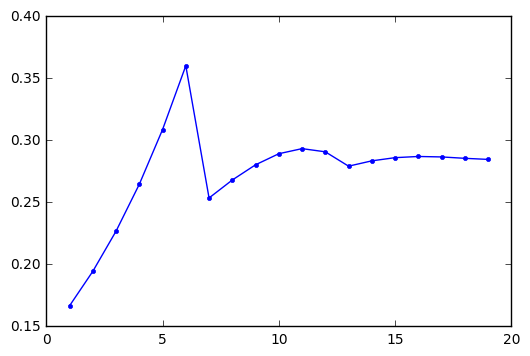

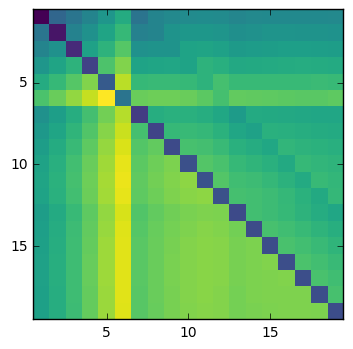

In [127]:
plt.plot(v,single[1:],marker='.')
plt.show()
plt.imshow(double[1:,1:], cmap='viridis',interpolation ='nearest',extent = (0.5,19.5,19.5,0.5))
plt.show()

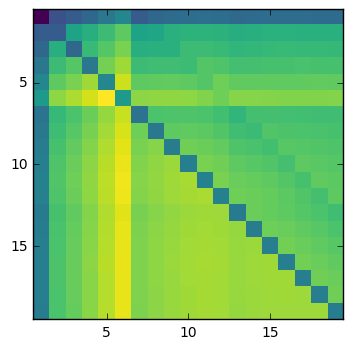

In [186]:
import itertools
fig = plt.figure()

im = plt.imshow(triple[1:20,1:20,1],
                cmap='viridis',
                interpolation='nearest',
                extent = (0.5,19.5,19.5,0.5))

cycler = itertools.cycle(v)

def updatefig(i):
    z = next(cycler)
    im.set_array(triple[1:20,1:20,z])
    return [im]

In [188]:
ani = animation.FuncAnimation(fig, updatefig, interval=200, blit=True)
HTML(ani.to_html5_video())

In [198]:
m = np.max(triple[1:,1:,1:])
i = np.argmax(m)
np.unravel_index(i,(20,20,20))

(0, 0, 0)

In [199]:
m = np.max(double[1:,1:])
i = np.argmax(m)
np.unravel_index(i,(20,20))

(0, 0)